In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import networkx as nx
plt.style.use('ggplot') 
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [140]:
edgesDF = pd.read_excel("MadridMetroDataset.xlsx",sheet_name='Edges' )

In [141]:
edgesDF.head()

From   To Line  Weight
0   153  152    1   7.125
1   152  151    1   7.125
2   151  101    1   7.125
3   101  102    1   7.125
4   102  103    1   7.125

In [142]:
edgesDF.Line.unique()

array([1, 2, 3, 4, 5, 6, '7b', 7, 8, 9, '9b', '10b', 10, 11, 12, 'R'],
      dtype=object)

In [143]:
nodesDF = pd.read_excel('MadridMetroDataset.xlsx',sheet_name='Nodes')
print(nodesDF.shape)
nodesDF.head()

(242, 14)


StationID          StationName  Entries  Utilization  NumberLines  \
0       1102             Abrantes   838992      1460425            1   
1        519              Acacias  1411894      4098463            1   
2        806  Aeropuerto T1-T2-T3  2879690      3738740            1   
3        808        Aeropuerto T4  1758401      2913657            1   
4        552     Alameda de Osuna  1336992      3110859            1   

    Latitude  Longitude           Coordinates  LatHour  LatMin  LatSec  \
0  40.381667  -3.726944  40°22′54″N 3°43′37″O       40      22      54   
1  40.405000  -3.702778  40°24′18″N 3°42′10″O       40      24      18   
2  40.468056  -3.570556  40°28′05″N 3°34′14″O       40      28       5   
3  40.491389  -3.594167  40°29′29″N 3°35′39″O       40      29      29   
4  40.456389  -3.587222  40°27′23″N 3°35′14″O       40      27      23   

   LonHour  LonMin  LonSec  
0        3      43      37  
1        3      42      10  
2        3      34      14  
3        3      35      39  
4        3      35      14

In [144]:
nodesDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 14 columns):
StationID      242 non-null int64
StationName    242 non-null object
Entries        242 non-null int64
Utilization    242 non-null int64
NumberLines    242 non-null int64
Latitude       242 non-null float64
Longitude      242 non-null float64
Coordinates    242 non-null object
LatHour        242 non-null int64
LatMin         242 non-null int64
LatSec         242 non-null int64
LonHour        242 non-null int64
LonMin         242 non-null int64
LonSec         242 non-null int64
dtypes: float64(2), int64(10), object(2)
memory usage: 26.6+ KB


In [145]:
len(nodesDF.StationID.unique())

242

In [146]:
weightDF = edgesDF[['Line','From','To','Weight']]
weightDF.head()




Line  From   To  Weight
0    1   153  152   7.125
1    1   152  151   7.125
2    1   151  101   7.125
3    1   101  102   7.125
4    1   102  103   7.125

In [147]:
weightDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 4 columns):
Line      279 non-null object
From      279 non-null int64
To        279 non-null int64
Weight    279 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 8.8+ KB


In [148]:
data = weightDF.loc[:,"From":].values.astype(int)
Madrid_tube = nx.Graph()
Madrid_tube.add_nodes_from(list(range(0,)))
Madrid_tube.add_weighted_edges_from(data,)


In [149]:
stationname_dict = {}
entries_dict = {}
utilization_dict = {}
numberlines_dict = {}
for key in nodesDF.StationID:
    stationname_dict[key] = nodesDF.loc[nodesDF.StationID == key,['StationName']].values[0][0]
    entries_dict[key]     = nodesDF.loc[nodesDF.StationID == key,['Entries']].values[0][0]
    utilization_dict[key] = nodesDF.loc[nodesDF.StationID == key,['Utilization']].values[0][0]
    numberlines_dict[key] = nodesDF.loc[nodesDF.StationID == key,['NumberLines']].values[0][0]
    
nx.set_node_attributes(Madrid_tube, stationname_dict, 'StationName')
nx.set_node_attributes(Madrid_tube, entries_dict, 'Entries')
nx.set_node_attributes(Madrid_tube, utilization_dict, 'Utilization')
nx.set_node_attributes(Madrid_tube, numberlines_dict, 'NumberLines')

In [150]:
# label_dict = {}
# for key in nodesDF.StationID:
#     item_dict = {}
#     item_dict['StationName'] = nodesDF.loc[nodesDF.StationID == key,['StationName']].values[0][0]
#     item_dict['Entries'] = nodesDF.loc[nodesDF.StationID == key,['Entries']].values[0][0]
#     item_dict['Utilization'] = nodesDF.loc[nodesDF.StationID == key,['Utilization']].values[0][0]
#     item_dict['NumberLines'] = nodesDF.loc[nodesDF.StationID == key,['NumberLines']].values[0][0]
#     label_dict[key] = item_dict
    
# nx.set_node_attributes(Madrid_tube, label_dict, 'labels')

In [151]:
graph_dict = dict(list(zip(['Madrid_tube'],
                      [Madrid_tube])))
for key in graph_dict:
    print(key)
    print(nx.info(graph_dict[key]))
    print()

Madrid_tube
Name: 
Type: Graph
Number of nodes: 242
Number of edges: 276
Average degree:   2.2810



In [152]:
## Paula

edgesDF['line_colour'] = edgesDF['Line'].replace('7b','7')
edgesDF['line_colour'] = edgesDF['line_colour'].replace('9b','9')
edgesDF['line_colour'] = edgesDF['line_colour'].replace('10b','10')
edgesDF['line_colour'] = edgesDF['line_colour'].replace('R','13')
edgesDF['line_colour'] = edgesDF['line_colour'].astype(int)
linesDF = edgesDF[['From','To','line_colour']]
data = linesDF.loc[:,"From":].values.astype(int)
Madrid_tube.add_weighted_edges_from(data,weight='line')
CR = [Madrid_tube[u][v]['line'] for u, v in Madrid_tube.edges]
color = np.where(np.asarray(CR) == 1,"#30a3dc", CR).tolist()
color = np.where(np.asarray(color) == '2',"#cd031d", color).tolist()
color = np.where(np.asarray(color) == '3',"#ffe114", color).tolist()
color = np.where(np.asarray(color) == '4',"#944248", color).tolist()
color = np.where(np.asarray(color) == '5',"#96bf0d", color).tolist()
color = np.where(np.asarray(color) == '6',"#a0a5a7", color).tolist()
color = np.where(np.asarray(color) == '7',"#faa64a", color).tolist()
color = np.where(np.asarray(color) == '8',"#f27ca2", color).tolist()
color = np.where(np.asarray(color) == '9',"#a93094", color).tolist()
color = np.where(np.asarray(color) == '10',"#084594", color).tolist()
color = np.where(np.asarray(color) == '11',"#008b43", color).tolist()
color = np.where(np.asarray(color) == '12',"#a49a00", color).tolist()
color = np.where(np.asarray(color) == '13',"#093163", color).tolist()
weights = [Madrid_tube[u][v]['weight'] for u,v in Madrid_tube.edges]

# entries = (nodesDF['Entries']/30000).values.tolist()
# exits = (abs(nodesDF['Entries']-nodesDF['Utilization'])/30000).values.tolist()
# utilization =  (nodesDF['Utilization']/30000).values.tolist()

entries = []
for number in [el[1] for el in list(Madrid_tube.nodes.data('Entries'))]:
    entries.append(number / 50000)

utilization = []
for number in [el[1] for el in list(Madrid_tube.nodes.data('Utilization'))]:
    utilization.append(number / 50000)
    
exits = (np.array(utilization) - np.array(entries)).tolist()

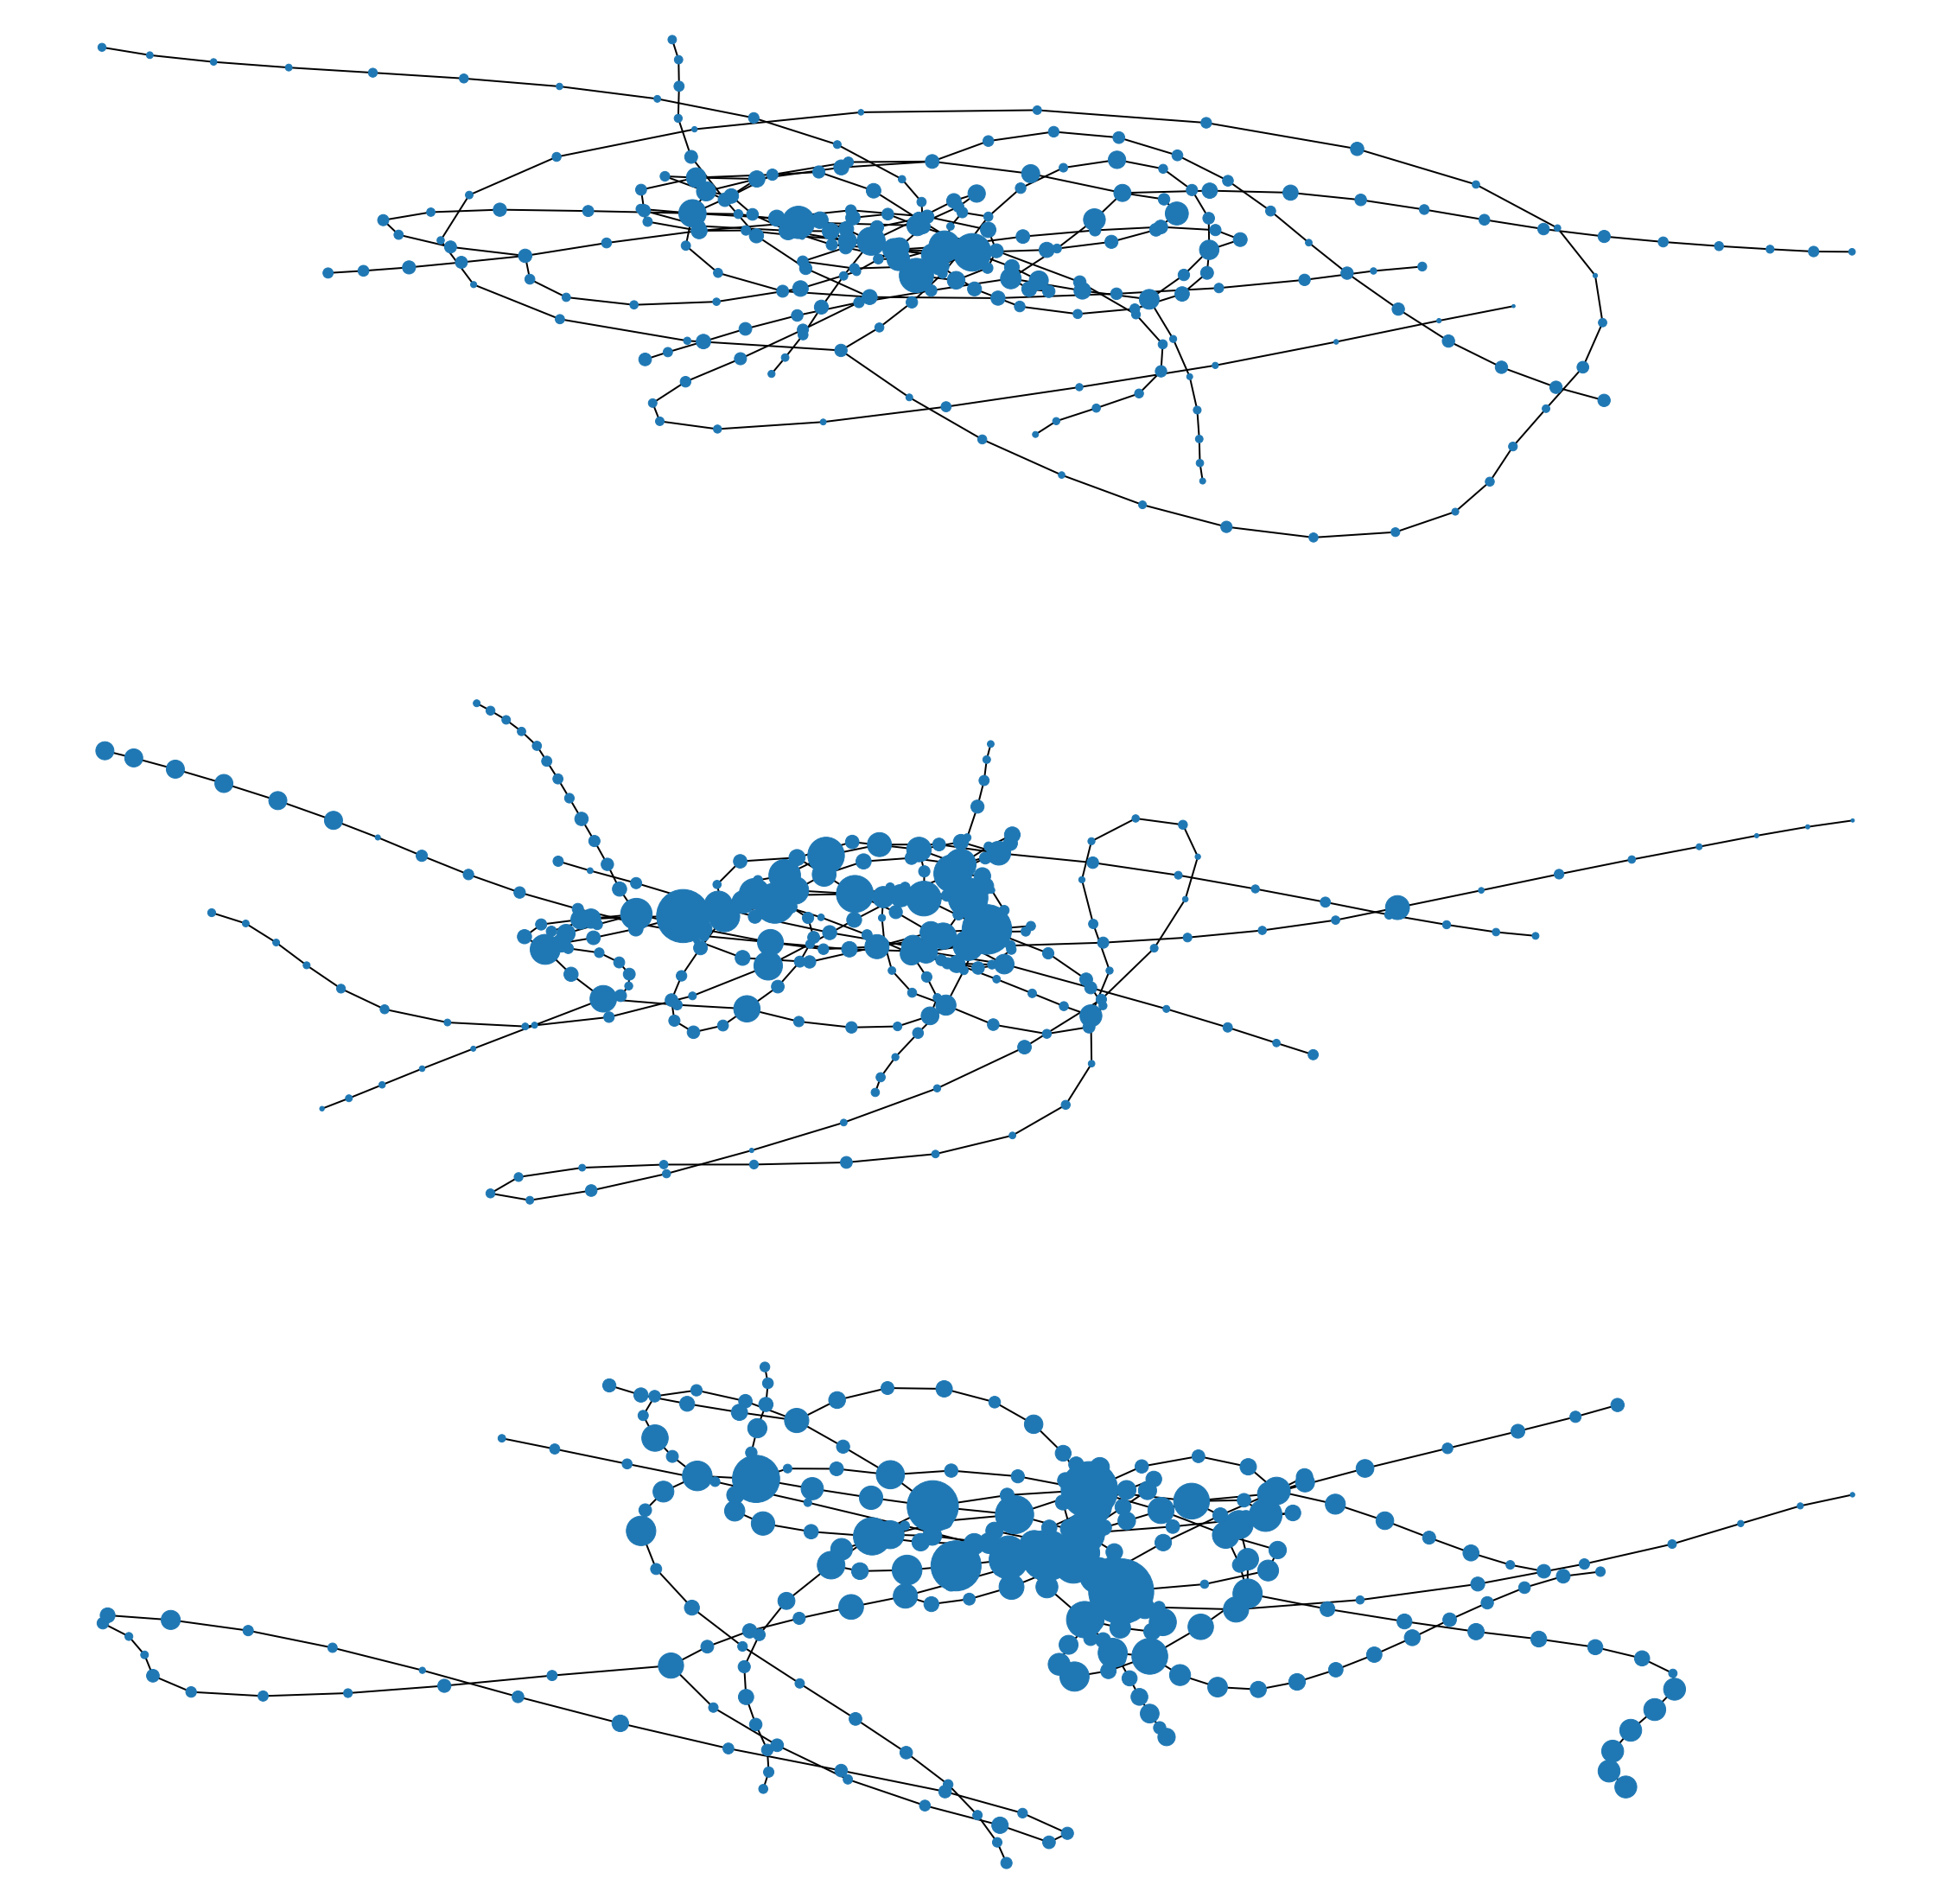

In [153]:
fig, ax = plt.subplots(nrows=3
                       ,figsize=(20,20))
nx.draw(Madrid_tube
        ,edge_cmap= cm.get_cmap('spring')
        ,ax=ax[0]
        ,node_size=entries)

nx.draw(Madrid_tube
        ,edge_cmap= cm.get_cmap('summer')
        ,ax=ax[1]
        ,node_size=exits)

nx.draw(Madrid_tube
        ,edge_cmap= cm.get_cmap('inferno')
        ,ax=ax[2]
        ,node_size=utilization)

In [154]:
pos_dict = {}
for key in nodesDF.StationID:
    pos_dict[key] = list(nodesDF.loc[nodesDF.StationID == key,['Longitude','Latitude']].values[0])

In [155]:
# #station names
# Stationlabels=dict((n,d['labels']['StationName']) for n,d in Madrid_tube.nodes(data=True))

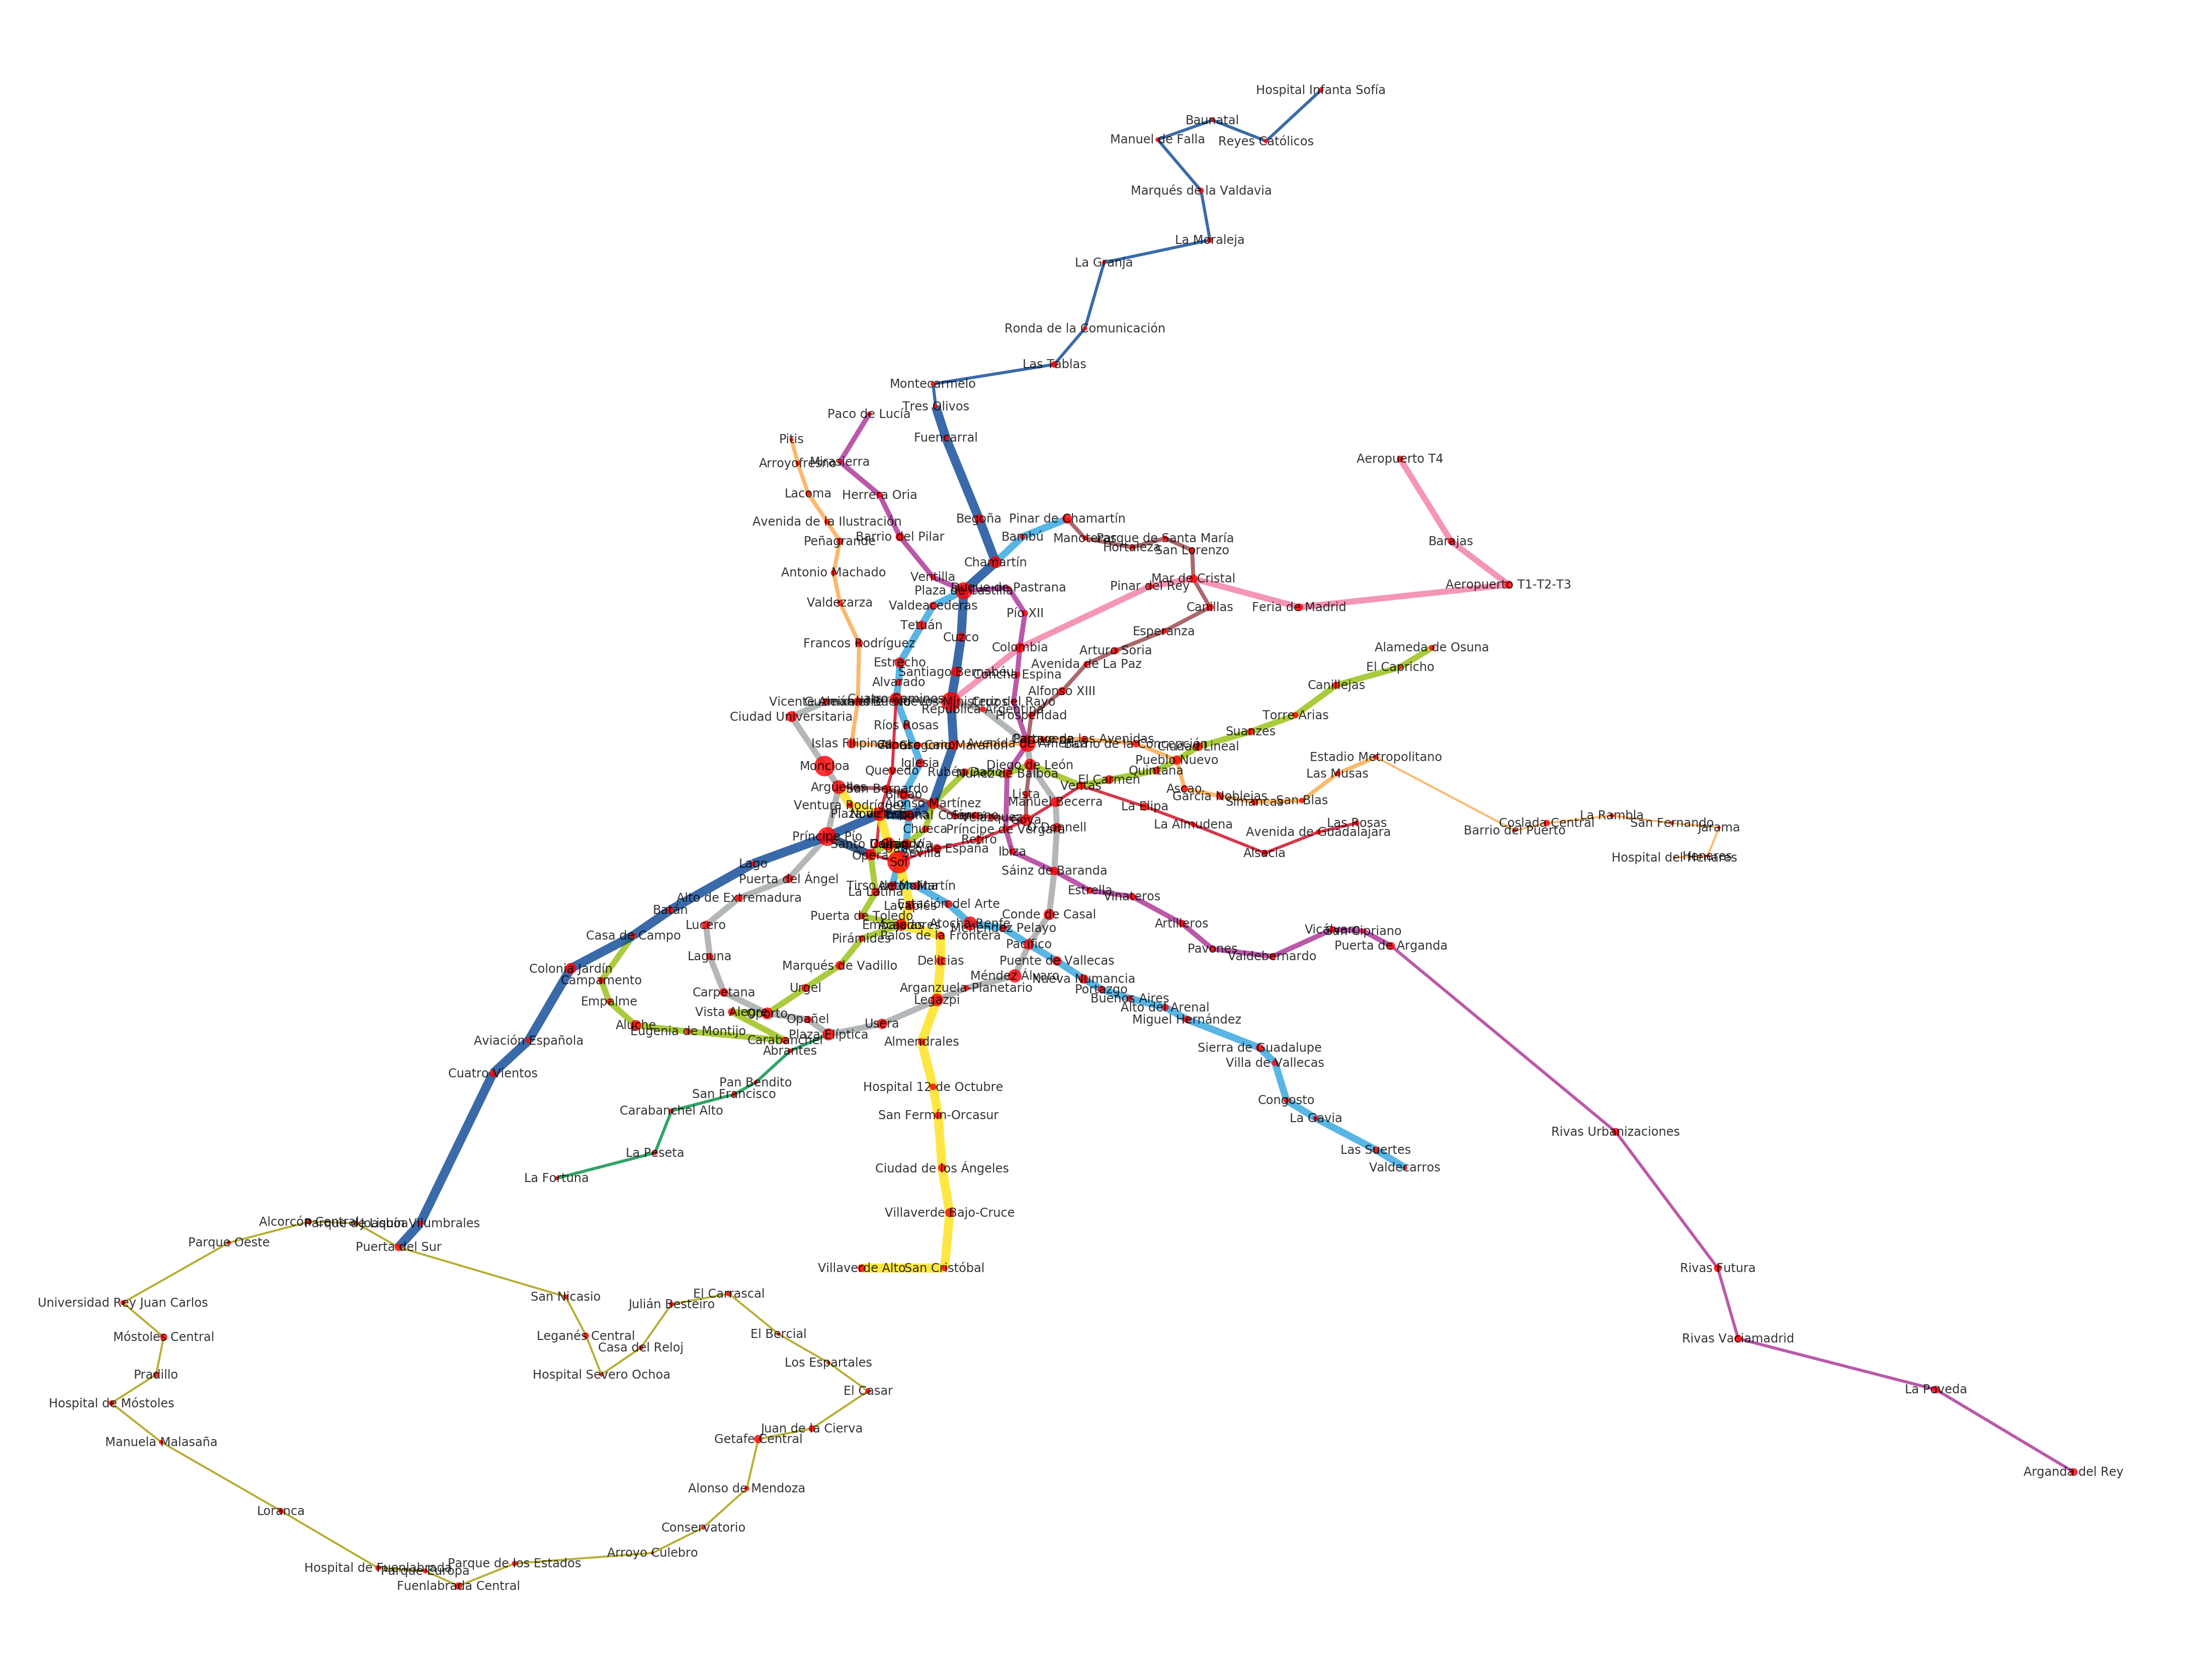

In [156]:
# plt.figure(figsize=(30,30))
# nx.draw(Madrid_tube,pos=pos_dict,node_size=20,edge_color=color_lines,node_color='r',alpha=0.8)
# plt.show()

plt.figure(figsize=(30,23))
nx.draw(Madrid_tube,pos=pos_dict,node_size=entries,edge_color=color,node_color='r'
        ,width=weights,alpha=0.8,labels=Stationlabels)
plt.show()

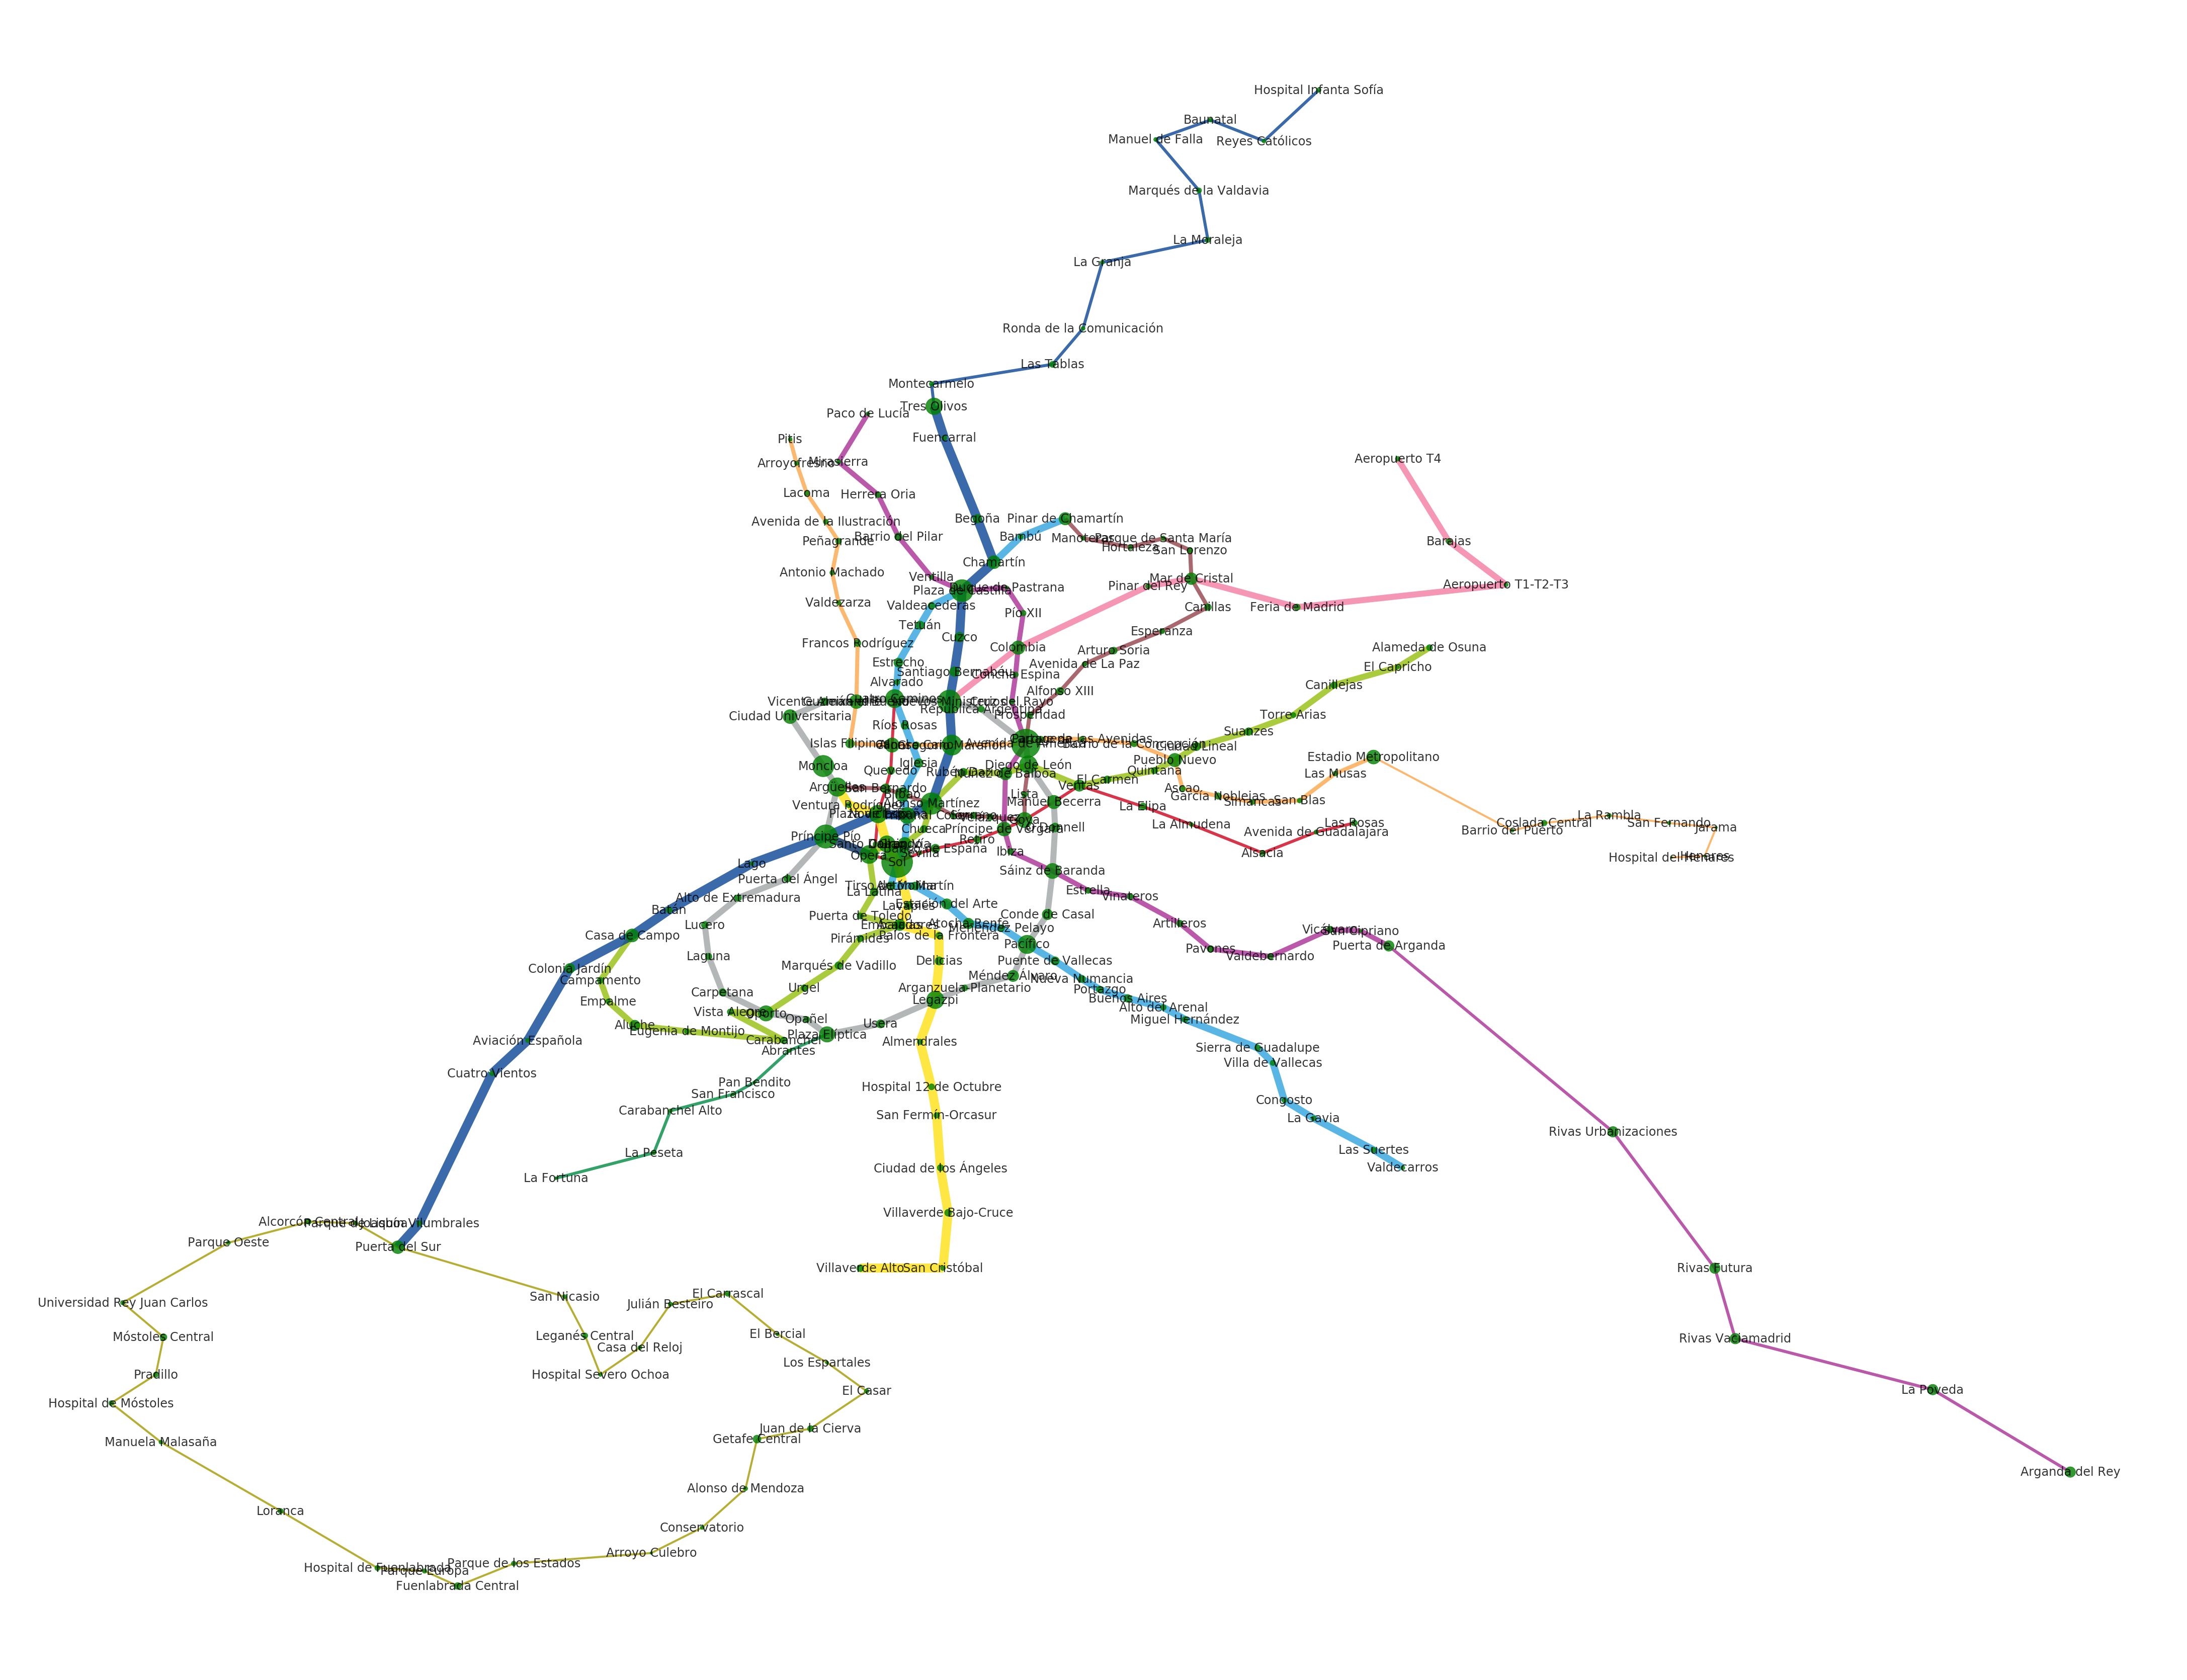

In [157]:
# plt.figure(figsize=(30,30))
# nx.draw(Madrid_tube,pos=pos_dict,node_size=20,edge_color=color_lines,node_color='r',alpha=0.8)
# plt.show()

plt.figure(figsize=(30,23))
nx.draw(Madrid_tube,pos=pos_dict,node_size=exits,edge_color=color,node_color='g',width=weights,alpha=0.8
        ,labels=Stationlabels)
plt.show()

In [158]:
#!pip install mplleaflet

In [159]:
#dic = Madrid_tube.edge_attr_dict_factory

In [160]:
weights

[7,
 4,
 7,
 9,
 9,
 7,
 5,
 5,
 9,
 7,
 7,
 7,
 7,
 7,
 3,
 6,
 6,
 7,
 7,
 7,
 4,
 4,
 7,
 9,
 9,
 7,
 6,
 6,
 7,
 3,
 3,
 9,
 9,
 7,
 7,
 7,
 7,
 7,
 7,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 7,
 3,
 3,
 3,
 3,
 3,
 3,
 6,
 6,
 3,
 6,
 6,
 3,
 4,
 4,
 3,
 5,
 5,
 3,
 3,
 3,
 6,
 6,
 8,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 6,
 6,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 6,
 6,
 6,
 4,
 6,
 6,
 9,
 4,
 4,
 4,
 6,
 6,
 4,
 6,
 4,
 4,
 5,
 5,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 6,
 4,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 4,
 4,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 6,
 9,
 9,
 6,
 6,
 6,
 6,
 3,
 6,
 6,
 6,
 5,
 5,
 6,
 6,
 9,
 9,
 6,
 4,
 4,
 6,
 6,
 9,
 6,
 6,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 6,
 5,
 5,
 6,
 6,
 6,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 5,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 3,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 9,
 2,
 2,
 3,
 3,
 3,
 3,
 3,


In [161]:
# plt.figure(figsize=(30,23))
# nx.draw(Madrid_tube,pos=pos_dict,node_size=exits,edge_color=color,node_color='g',width=weights,alpha=0.8
#         ,labels=Stationlabels)
# plt.show()
# -----------


import mplleaflet



pos = pos_dict
labels = Stationlabels


fig, ax = plt.subplots(figsize=(10,10))
plt.style.use(['dark_background'])

nx.draw(Madrid_tube,pos=pos_dict,node_size=entries,edge_color=color,node_color='b',alpha=0.9
        ,width=(np.array(weights)/1500).tolist()
#        ,labels=Stationlabels
       )

mplleaflet.display(fig=fig)

/Users/mamer/opt/anaconda3/lib/python3.7/site-packages/IPython/core/display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [162]:
from collections import Counter
c = Counter(Madrid_tube.edges())  # Contains frequencies of each directed edge.

for u, v, d in Madrid_tube.edges(data=True):
    d['weight'] = c[u, v]


    
weightss = [d['weight'] for _, _, d in Madrid_tube.edges(data=True)]    


In [163]:
Madrid_tube.nodes(data=True)

NodeDataView({153: {'StationName': 'Pinar de Chamartín', 'Entries': 4101034, 'Utilization': 11709050, 'NumberLines': 2}, 152: {'StationName': 'Bambú', 'Entries': 1159127, 'Utilization': 2413194, 'NumberLines': 1}, 151: {'StationName': 'Chamartín', 'Entries': 6426557, 'Utilization': 14738349, 'NumberLines': 2}, 101: {'StationName': 'Plaza de Castilla', 'Entries': 13279507, 'Utilization': 37361848, 'NumberLines': 3}, 102: {'StationName': 'Valdeacederas', 'Entries': 2711332, 'Utilization': 5038540, 'NumberLines': 1}, 103: {'StationName': 'Tetuán', 'Entries': 3511657, 'Utilization': 6895295, 'NumberLines': 1}, 104: {'StationName': 'Estrecho', 'Entries': 5072727, 'Utilization': 9203377, 'NumberLines': 1}, 105: {'StationName': 'Alvarado', 'Entries': 2031672, 'Utilization': 3463184, 'NumberLines': 1}, 106: {'StationName': 'Cuatro Caminos', 'Entries': 7056088, 'Utilization': 23402733, 'NumberLines': 3}, 107: {'StationName': 'Ríos Rosas', 'Entries': 2311575, 'Utilization': 5112119, 'NumberLines

In [164]:
diameter = nx.diameter(Madrid_tube)
print(nx.diameter(Madrid_tube))

44


**How to get the shortest path between two stations?**

In [165]:
def find_shortest_path(Graph,df,FromStation,ToStation):
    nodecheck = 1
    try:
        start_node = int(df.StationID[df.StationName==FromStation])
    except:
        print('Your start point does not exist.')
        nodecheck = 0
    try:
        end_node = int(df.StationID[df.StationName==ToStation])
    except:
        print('Your start point does not exist.')
        nodecheck = 0
    if nodecheck == 1:
        try:
            pathlength = nx.shortest_path_length(Graph, start_node, end_node)
            path = nx.shortest_path(Graph, start_node, end_node)
            print("The shortest path from {} to {} crosses".format(FromStation,ToStation), end=' ') 
            print((', ').join(list(df.StationName[path])[1:-1])+".")
            print("The path length is", str(pathlength)+'.')
            print("You will have to take the following lines:")
            connection = list(df.StationID[nx.shortest_path(Graph, start_node, end_node)])
            lines = []
            for i in range(len(connection)-1):
                conn = list(weightDF.Line[((weightDF.From==connection[i]) & (weightDF.To==connection[i+1])) |
                        ((weightDF.From==connection[i+1]) & (weightDF.To==connection[i]))])
                #print(conn)
                if len(conn)>1:
                    conn = ' or ' + str(conn)
                else: 
                    conn = conn[0]
                if conn not in lines:
                    lines.append(conn)
            print((str(lines)))
        except:
            print("There is no path between {} and {}.".format(FromStation,ToStation))
            

In [166]:
FromStation = 'Aeropuerto T4'
ToStation = 'Avenida de América'
Graph = Madrid_tube
start_node = int(nodesDF.StationID[nodesDF.StationName==FromStation])
end_node = int(nodesDF.StationID[nodesDF.StationName==ToStation])
df = nodesDF
df.index = df['StationID']
pathlength = nx.shortest_path_length(Graph, start_node, end_node)
path = nx.shortest_path(Graph, start_node, end_node)
print("The shortest path from {} to {} crosses".format(FromStation,ToStation), end=' ') 
print((', ').join(list(df.StationName[path])[1:-1])+".")
print("The path length is", str(pathlength)+'.')
print("You will have to take the following lines:")
connection = list(df.StationID[nx.shortest_path(Graph, start_node, end_node)])
lines = []
for i in range(len(connection)-1):
    conn = list(weightDF.Line[((weightDF.From==connection[i]) & (weightDF.To==connection[i+1])) |
            ((weightDF.From==connection[i+1]) & (weightDF.To==connection[i]))])
    #print(conn)
    if len(conn)>1:
        conn = ' or ' + str(conn)
    else: 
        conn = conn[0]
    if conn not in lines:
        lines.append(conn)
print((str(lines)))


The shortest path from Aeropuerto T4 to Avenida de América crosses Barajas, Aeropuerto T1-T2-T3, Feria de Madrid, Mar de Cristal, Pinar del Rey, Colombia, Nuevos Ministerios, República Argentina.
The path length is 9.
You will have to take the following lines:
[8, 6]


In [138]:
df.head(1)


StationID StationName  Entries  Utilization  NumberLines  \
StationID                                                             
1102            1102    Abrantes   838992      1460425            1   

            Latitude  Longitude           Coordinates  LatHour  LatMin  \
StationID                                                                
1102       40.381667  -3.726944  40°22′54″N 3°43′37″O       40      22   

           LatSec  LonHour  LonMin  LonSec  
StationID                                   
1102           54        3      43      37

In [102]:


start_node = int(nodesDF.StationID[nodesDF.StationName==FromStation])
end_node = int(nodesDF.StationID[nodesDF.StationName==ToStation])
print(start_node,end_node)

808 411


In [111]:
find_shortest_path(Madrid_tube,nodesDF,FromStation,ToStation)

The shortest path from Aeropuerto T4 to Avenida de América crosses Barajas, Aeropuerto T1-T2-T3, Feria de Madrid, Mar de Cristal, Pinar del Rey, Colombia, Nuevos Ministerios, República Argentina.
The path length is 9.
You will have to take the following lines:
[8, 6]


In [103]:
nx.shortest_path_length(Madrid_tube, start_node, end_node)

9

In [104]:
path = nx.shortest_path(Madrid_tube, start_node, end_node)
print(path)

[808, 807, 806, 805, 418, 803, 802, 618, 617, 411]


In [105]:
nodesDF.head()

StationID          StationName  Entries  Utilization  NumberLines  \
StationID                                                                      
1102            1102             Abrantes   838992      1460425            1   
519              519              Acacias  1411894      4098463            1   
806              806  Aeropuerto T1-T2-T3  2879690      3738740            1   
808              808        Aeropuerto T4  1758401      2913657            1   
552              552     Alameda de Osuna  1336992      3110859            1   

            Latitude  Longitude           Coordinates  LatHour  LatMin  \
StationID                                                                
1102       40.381667  -3.726944  40°22′54″N 3°43′37″O       40      22   
519        40.405000  -3.702778  40°24′18″N 3°42′10″O       40      24   
806        40.468056  -3.570556  40°28′05″N 3°34′14″O       40      28   
808        40.491389  -3.594167  40°29′29″N 3°35′39″O       40      29   
552        40.456389  -3.587222  40°27′23″N 3°35′14″O       40      27   

           LatSec  LonHour  LonMin  LonSec  
StationID                                   
1102           54        3      43      37  
519            18        3      42      10  
806             5        3      34      14  
808            29        3      35      39  
552            23        3      35      14

In [41]:
nodesDF.index = nodesDF['StationID']

In [58]:
nodesDF.head(1)

StationID StationName  Entries  Utilization  NumberLines  \
StationID                                                             
1102            1102    Abrantes   838992      1460425            1   

            Latitude  Longitude           Coordinates  LatHour  LatMin  \
StationID                                                                
1102       40.381667  -3.726944  40°22′54″N 3°43′37″O       40      22   

           LatSec  LonHour  LonMin  LonSec  
StationID                                   
1102           54        3      43      37

In [42]:
print((', ').join(list(nodesDF.StationName[path])[1:-1])+".")

Avenida de Guadalajara, Alsacia, La Almudena, La Elipa, Ventas, Diego de León.


In [57]:
connection = list(nodesDF.StationID[nx.shortest_path(Madrid_tube, start_node, end_node)])
connection

[255, 254, 253, 252, 251, 201, 410, 411]

In [63]:
connection = list(df.StationID[nx.shortest_path(Graph, start_node, end_node)])
connection

[255, 254, 253, 252, 251, 201, 410, 411]

In [44]:
list(weightDF.Line[((weightDF.From==connection[0]) & (weightDF.To==connection[1])) |
                        ((weightDF.From==connection[1]) & (weightDF.To==connection[0]))])

[2]

In [66]:
connection[0]

255

In [67]:
nodesDF.StationName[connection[0]]

'Las Rosas'

In [68]:
weightDF.head(1)

Line  From   To  Weight
0    1   153  152   7.125

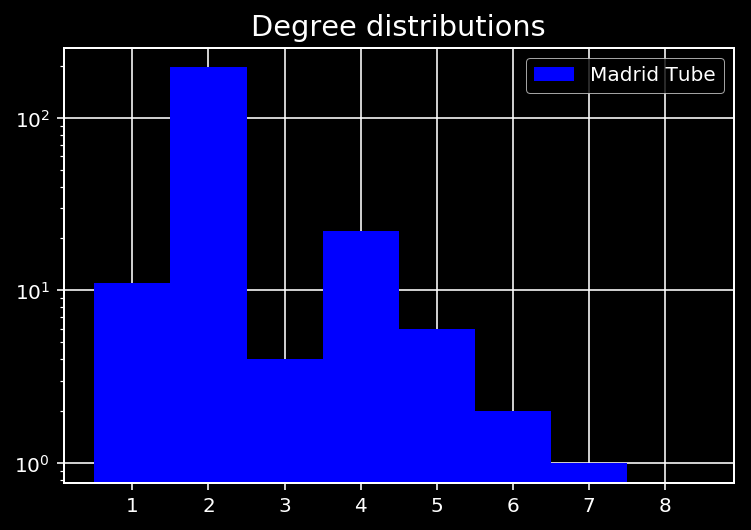

In [69]:
colors = ['blue']
plt.hist([list(dict(nx.degree(Madrid_tube)).values())],
         bins=np.linspace(0,8,9)+0.5,alpha=1,stacked=False,color=colors,label=colors)
plt.yscale('log')
plt.legend(['Madrid Tube'],prop={'size': 10})
plt.title('Degree distributions')
plt.show()

In [70]:
nodesDF['betweenness_centrality'] = list(nx.betweenness_centrality(Madrid_tube).values())

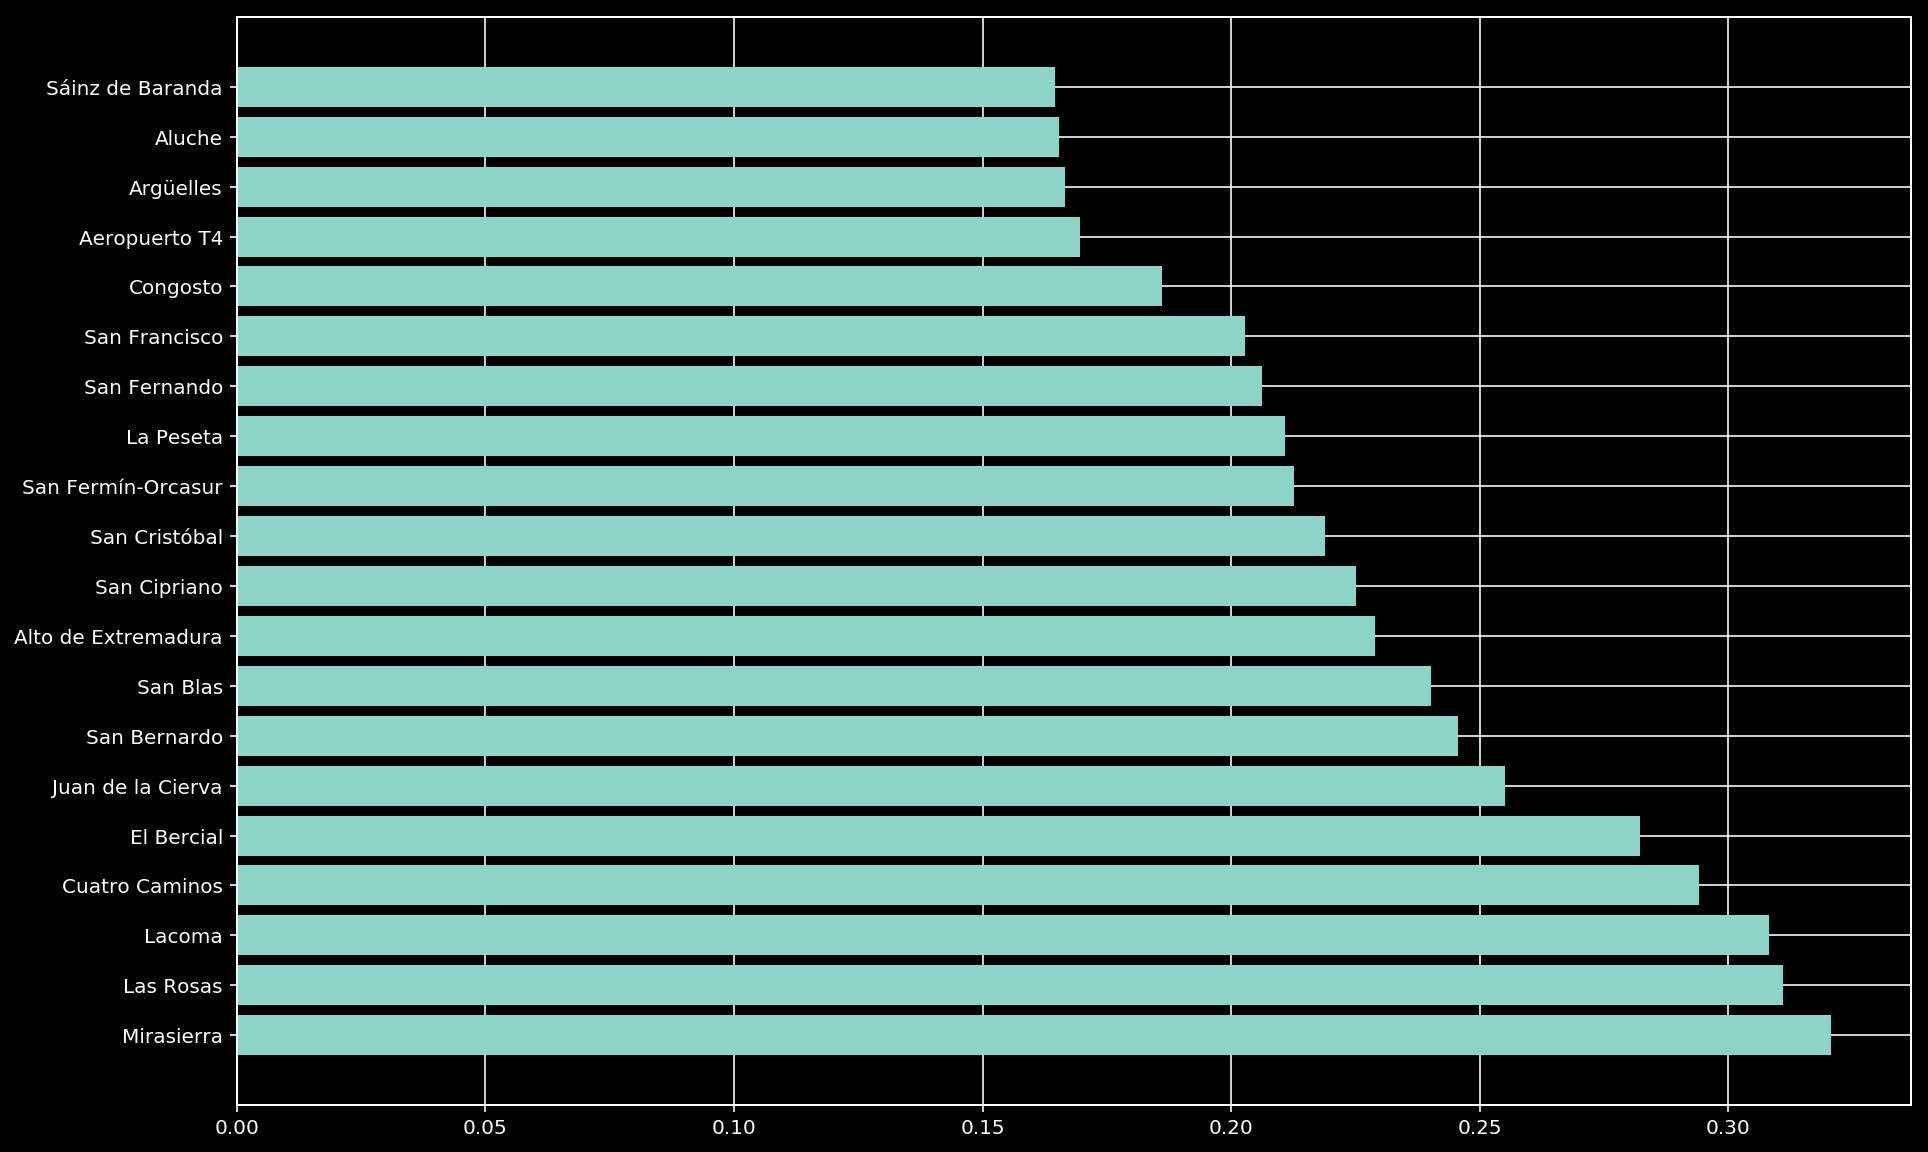

In [71]:
plt.figure(figsize=(15,10))
plt.barh(list(range(20)),nodesDF.sort_values(by='betweenness_centrality',ascending=False)
         .head(20).betweenness_centrality)
plt.yticks(list(range(20)),nodesDF.sort_values(by='betweenness_centrality',ascending=False).head(20).StationName)
plt.show()

In [72]:
nodesDF['closeness_centrality'] = list(nx.closeness_centrality(Madrid_tube).values())

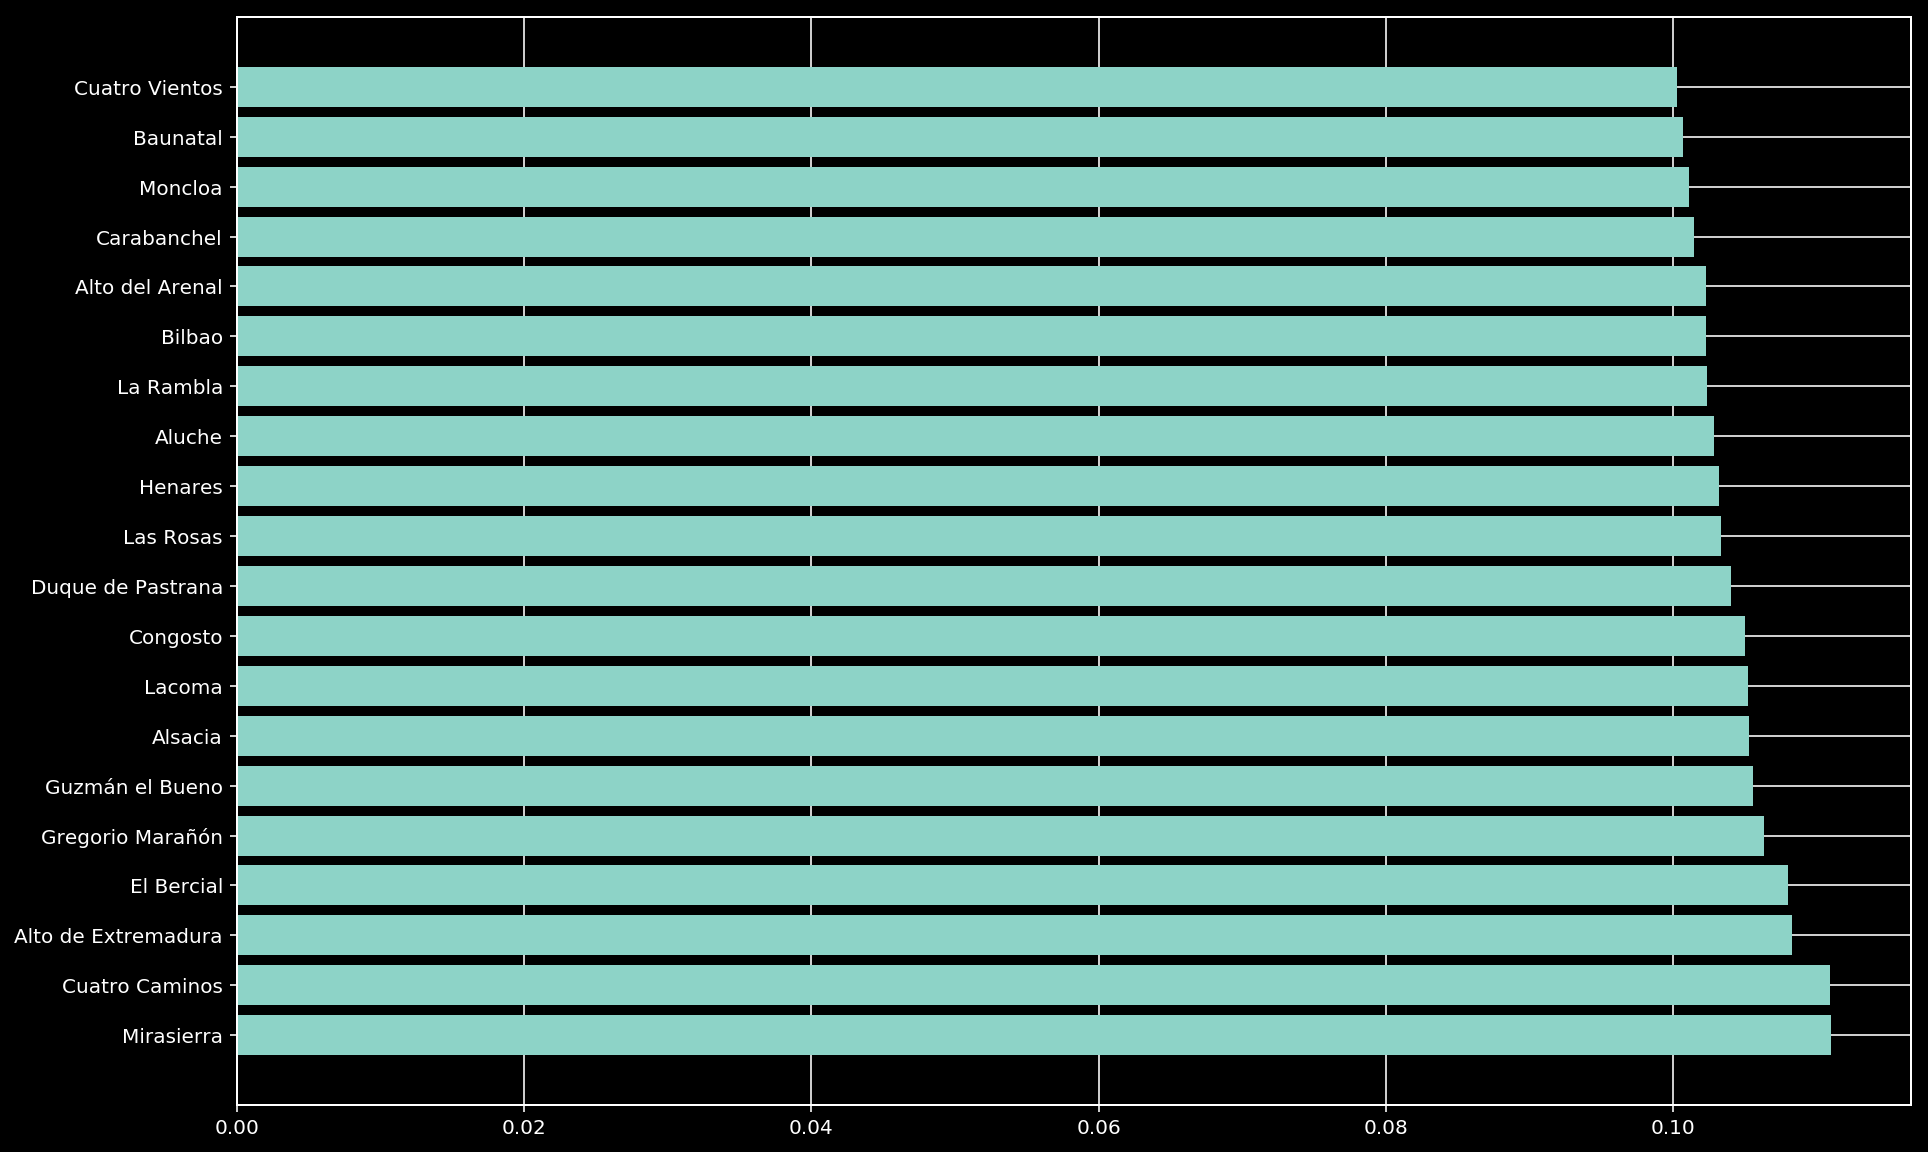

In [73]:
plt.figure(figsize=(15,10))
plt.barh(list(range(20)),nodesDF.sort_values(by='closeness_centrality',ascending=False)
         .head(20).closeness_centrality)
plt.yticks(list(range(20)),nodesDF.sort_values(by='closeness_centrality',ascending=False).head(20).StationName)
plt.show()

In [74]:
#Average shortest path length
nx.average_shortest_path_length(Madrid_tube)

14.583690545591715

In [75]:
#Clusterting coefficient



nx.transitivity(Madrid_tube)

0.03325942350332594

In [76]:
 nx.all_shortest_paths

<function networkx.algorithms.shortest_paths.generic.all_shortest_paths(G, source, target, weight=None, method='dijkstra')>

In [77]:
nx.is_weighted(Madrid_tube)
nx.is_directed(Madrid_tube)


False

In [78]:
Madrid_tube.edges()

EdgeView([(153, 152), (153, 422), (152, 151), (151, 101), (151, 1002), (101, 102), (101, 903), (101, 905), (101, 1005), (102, 103), (103, 104), (104, 105), (105, 106), (106, 107), (106, 214), (106, 618), (106, 620), (107, 108), (108, 109), (109, 110), (109, 212), (109, 404), (110, 111), (110, 404), (110, 308), (111, 112), (111, 513), (111, 307), (112, 113), (112, 207), (112, 209), (112, 305), (112, 307), (113, 114), (114, 115), (115, 116), (116, 117), (117, 118), (118, 119), (118, 609), (118, 611), (119, 120), (120, 121), (121, 122), (122, 123), (123, 124), (124, 125), (125, 126), (126, 127), (127, 128), (128, 129), (129, 130), (255, 254), (254, 253), (253, 252), (252, 251), (251, 201), (201, 202), (201, 507), (201, 410), (202, 203), (202, 613), (202, 410), (203, 204), (203, 407), (203, 409), (204, 205), (204, 510), (204, 913), (205, 206), (206, 207), (209, 210), (209, 307), (209, 517), (209, 625), (210, 211), (211, 212), (212, 213), (212, 310), (213, 214), (214, 712), (214, 714), (357

In [79]:
Madrid_tube.get_edge_data(1228,1229)

{'weight': {...}, 'line': 12}

In [80]:
weightDF[weightDF['From'] == 1228].head()

Line  From    To    Weight
275   12  1228  1229  2.357143